In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Generating Random Training Data

In [2]:
# Create the initial set of random inputs
import random

number_training_inputs = 1000
tuple_length = 2
training_inputs = []
int_max = 2_147_483_648 * 2

add_horn_data_bounds = [0, 5000]

def produce_random_int_tuples(tuple_length, number_random_tuples, value_bounds):
    random_tuples = []
    for i in range(number_random_tuples):
        random_tuple = []
        for j in range(tuple_length):
           random_value = random.randint(value_bounds[0], value_bounds[1])
           random_tuple.append(random_value)
        random_tuples.append(tuple(random_tuple))
    return random_tuples
    
training_inputs = produce_random_int_tuples(tuple_length=tuple_length, number_random_tuples=number_training_inputs, value_bounds=add_horn_data_bounds)
print(training_inputs)

[(1485, 858), (2264, 4856), (924, 4485), (4519, 1603), (2850, 1094), (4196, 1954), (2955, 4805), (284, 2173), (3018, 4823), (1344, 1520), (557, 3685), (1008, 4791), (2500, 73), (2727, 1457), (1450, 4427), (2475, 1093), (3599, 124), (4629, 4685), (2196, 2743), (1058, 1021), (3086, 405), (4578, 3049), (1300, 2422), (1767, 3263), (2579, 1965), (4586, 842), (849, 2819), (3439, 2872), (1400, 2153), (4062, 2289), (513, 4618), (3064, 2432), (766, 1545), (2514, 1039), (4669, 1343), (3911, 3201), (633, 687), (3498, 2629), (3710, 234), (1455, 912), (1514, 2302), (4045, 1967), (2645, 3676), (3600, 3442), (1471, 2265), (4715, 3230), (4233, 4613), (71, 3907), (3758, 3278), (555, 3328), (2723, 492), (2845, 2499), (1228, 3494), (3567, 3538), (4656, 1779), (2704, 1434), (2464, 3679), (1724, 4439), (3787, 3874), (1137, 473), (1055, 725), (4902, 1304), (1013, 4235), (1920, 296), (3917, 3789), (4330, 2773), (292, 2370), (4129, 1353), (649, 4295), (1783, 451), (126, 546), (3687, 930), (4009, 788), (4881, 

##### Add Horn Function and Execution Code

In [3]:
def add_horn(m: int, n: int) -> int:
    r = 0
    if (m == 0):
        r = n
    else:
        r = add_horn(m - 1, n + 1)
    return r

# Execute the add horn function with the random pair inputs generated
def execute_add_horn(random_inputs):
    inputs_that_return = []
    inputs_that_throw_exceptions = []

    for pair in random_inputs:
        result = None
        m = pair[0]
        n = pair[1]
        try:
            result = add_horn(m, n)
        except:
            result = None
    
        if result is not None:
            inputs_that_return.append(pair)
        else:
            inputs_that_throw_exceptions.append(pair)

    return inputs_that_return, inputs_that_throw_exceptions

In [4]:
# Partition the training data
training_labels = execute_add_horn(random_inputs=training_inputs)
training_inputs_that_return = training_labels[0]
training_inputs_that_throw_exceptions = training_labels[1]
print(len(training_inputs_that_return))
print(len(training_inputs_that_throw_exceptions))

587
413


In [5]:
K = 3

In [6]:
# Cluster the good inputs
return_inputs_clusters = KMeans(n_clusters=K)
return_inputs_clusters.fit(training_inputs_that_return)
centroids_of_return_clusters = return_inputs_clusters.cluster_centers_
print(centroids_of_return_clusters)
print(len(return_inputs_clusters.labels_))

[[1774.47916667 2320.14583333]
 [1368.70135747 4155.85520362]
 [1410.12068966  761.05172414]]
587


In [7]:
# Cluster the bad inputs
exception_inputs_clusters = KMeans(n_clusters=K)
exception_inputs_clusters.fit(training_inputs_that_throw_exceptions)
centroids_of_exception_clusters = exception_inputs_clusters.cluster_centers_
print(centroids_of_exception_clusters)
print(len(exception_inputs_clusters.labels_))

[[4117.7114094   935.46979866]
 [3939.22297297 2766.49324324]
 [3989.47413793 4309.31034483]]
413


### Plotting the Training Inputs that result in Returns

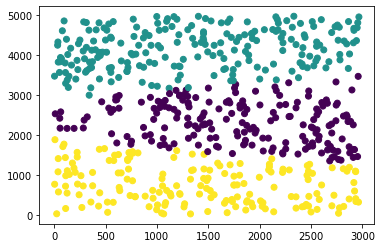

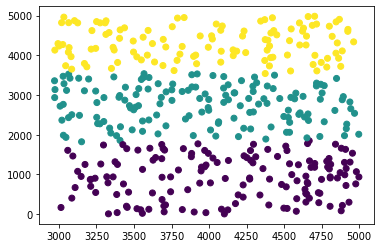

In [15]:
x_values_return = [x for x, y in training_inputs_that_return]
y_values_return = [y for x, y in training_inputs_that_return]
plt.scatter(x_values_return, y_values_return, c=return_inputs_clusters.labels_)
plt.show()

x_values_exception = [x for x, y in training_inputs_that_throw_exceptions]
y_values_exception = [y for x, y in training_inputs_that_throw_exceptions]
plt.scatter(x_values_exception, y_values_exception, c=exception_inputs_clusters.labels_)
plt.show()

### Test the Return / Exception Classification on new Test Data

In [9]:
# Generate new random triples
test_inputs = produce_random_int_tuples(tuple_length=tuple_length, number_random_tuples=number_training_inputs, value_bounds=add_horn_data_bounds)

print(len(test_inputs))
# Ensure there are no common elements between the training and test data
test_inputs = list(set(test_inputs) - set(training_inputs))
print(len(test_inputs))

# Obtain the ground truth test data
ground_truths = execute_add_horn(test_inputs)
ground_truth_returns = ground_truths[0]
ground_truth_exceptions = ground_truths[1]
print(len(ground_truth_returns))

1000
1000
604


In [10]:
# For each test input, infer which cluster it belongs to in both the set of 'return' and 'exception' clusters
preds_from_return_clusters = return_inputs_clusters.predict(test_inputs)
preds_from_exception_clusters = exception_inputs_clusters.predict(test_inputs)

In [11]:
from scipy.spatial import distance

test_inputs_inferred_as_returning = []
test_inputs_inferred_as_throwing_exceptions = []

for m in range(len(test_inputs)):
    test_input = test_inputs[m]

    # Get the respective predictions
    return_cluster_prediction = preds_from_return_clusters[m]
    exception_cluster_prediction = preds_from_exception_clusters[m]

    # Get the centroid of the cluster that each prediction belongs to
    return_cluster_centroid = centroids_of_return_clusters[return_cluster_prediction]
    exception_cluster_centroid = centroids_of_exception_clusters[exception_cluster_prediction]

    # Get the distance of the test_input from the predicted return and exception cluster
    distance_to_return_cluster_centroid = distance.euclidean(return_cluster_centroid, test_input)
    distance_to_exception_cluster_centroid = distance.euclidean(exception_cluster_centroid, test_input)
    
    # Choose the min and add to return or exception - inducing list
    if distance_to_return_cluster_centroid < distance_to_exception_cluster_centroid:
        test_inputs_inferred_as_returning.append(test_input)
    else:
        test_inputs_inferred_as_throwing_exceptions.append(test_input)
    
print(test_inputs_inferred_as_returning)
print(test_inputs_inferred_as_throwing_exceptions)

[(92, 3777), (4, 3893), (732, 830), (2533, 1488), (2268, 1441), (681, 1041), (951, 4181), (1478, 1959), (2300, 3379), (2532, 4012), (1145, 986), (2450, 3305), (2337, 1549), (1348, 3408), (948, 3712), (507, 2828), (1593, 2061), (1423, 2791), (2344, 3012), (1175, 3354), (1502, 3758), (1574, 4110), (2138, 1708), (1597, 459), (350, 2319), (2054, 164), (1327, 1138), (601, 2166), (1351, 839), (1286, 2534), (621, 1506), (1454, 4485), (973, 4792), (863, 4413), (1440, 233), (2624, 4858), (1082, 1864), (1316, 2525), (2069, 3976), (2759, 2962), (1817, 1406), (2229, 3974), (934, 3435), (2004, 2553), (522, 876), (569, 4316), (1027, 2031), (1017, 1730), (1418, 613), (36, 811), (2088, 435), (1502, 2153), (2382, 1946), (2342, 3042), (391, 648), (223, 2650), (1706, 3398), (880, 1608), (868, 322), (2205, 3994), (1075, 4178), (2479, 1326), (453, 479), (719, 440), (778, 3555), (2183, 1184), (561, 915), (1552, 1637), (2069, 3971), (1015, 1280), (2587, 1035), (2574, 2008), (2390, 1006), (483, 4635), (2543, 

In [12]:
print(len(test_inputs_inferred_as_returning))
print(len(test_inputs_inferred_as_throwing_exceptions))

571
429


### Accuracy Assessment for the Return / Exception Predictions

In [13]:
test_inputs_inferred_as_returning = set(test_inputs_inferred_as_returning)
ground_truth_returns = set(ground_truth_returns)

intersection_return_inferences_and_return_ground_truths = test_inputs_inferred_as_returning.intersection(ground_truth_returns)
print(len(intersection_return_inferences_and_return_ground_truths))
accuracy_return_inference = (len(intersection_return_inferences_and_return_ground_truths) / len(test_inputs_inferred_as_returning)) * 100
print(accuracy_return_inference)

571
100.0


In [14]:
test_inputs_inferred_as_throwing_exceptions = set(test_inputs_inferred_as_throwing_exceptions)
ground_truth_exceptions = set(ground_truth_exceptions)

intersection_exception_inferences_and_exception_ground_truths = test_inputs_inferred_as_throwing_exceptions.intersection(ground_truth_exceptions)
accuracy_exception_inference = (len(intersection_exception_inferences_and_exception_ground_truths) / len(test_inputs_inferred_as_throwing_exceptions)) * 100
print(accuracy_exception_inference)

92.3076923076923
